# Análise de Desempenho - Cruzeiro do Sul

<b> Departamento de Dados - BRG Educacional
    
    - Cenário 1 - Considerando os Dados da Cruzeiro como Verdade Absoluta


 


In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from unicodedata import normalize
df_municipios = pd.read_excel('Tabela_Municipio.xlsx')[['Nome','ESTADO (EXTENSO)','CIDADE_TIPO']]
df_municipios['ESTADO (EXTENSO)'] = df_municipios['ESTADO (EXTENSO)'].apply(lambda x :normalize('NFKD', x).encode('ASCII','ignore').decode('ASCII')).str.upper()
df_municipios = df_municipios.rename(columns={'Nome':'Cidade'})
df = pd.read_csv('Base_Cruzeiro_LeadScore.csv', low_memory=False).merge(df_municipios,left_on=['Cidade','Estado'],right_on=['Cidade','ESTADO (EXTENSO)'],how='left')

<B> ANÁLISE DOS RESULTADOS

In [4]:
leads_enviados = df[df['PLANILHA']=='EAD']['Envios'].sum().astype(int)
inscritos = df['EAD_insc'].sum().astype(int)
matriculados = df['EAD_mat'].sum().astype(int)
leads_enviados2 = df[df['PLANILHA']=='PRESENCIAL']['Envios'].sum().astype(int)
inscritos2 = df['PRESENCIAL_insc'].sum().astype(int)
matriculados2 = df['PRESENCIAL_mat'].sum().astype(int)

tx_conversao_inscrito = round((inscritos/leads_enviados)*100,3)
tx_conversao_matricula = round((matriculados/leads_enviados)*100,3)

tx_conversao_inscrito2 = round((inscritos2/leads_enviados2)*100,3)
tx_conversao_matricula2 = round((matriculados2/leads_enviados2)*100,3)

In [5]:
print('Resumo de Resultados:')
print('---------------------------------')
print('Total de Leads Enviados: ',leads_enviados+leads_enviados2)
print('---------------------------------')
print('Total de Inscritos: ',inscritos+inscritos2)
print('---------------------------------')
print('Total de Matriculados: ',matriculados+matriculados2)

Resumo de Resultados:
---------------------------------
Total de Leads Enviados:  342451
---------------------------------
Total de Inscritos:  29816
---------------------------------
Total de Matriculados:  4876


In [6]:
x = ['Enviados','Inscritos','Matriculados']
y = leads_enviados,inscritos,matriculados
y2 = leads_enviados2,inscritos2,matriculados2

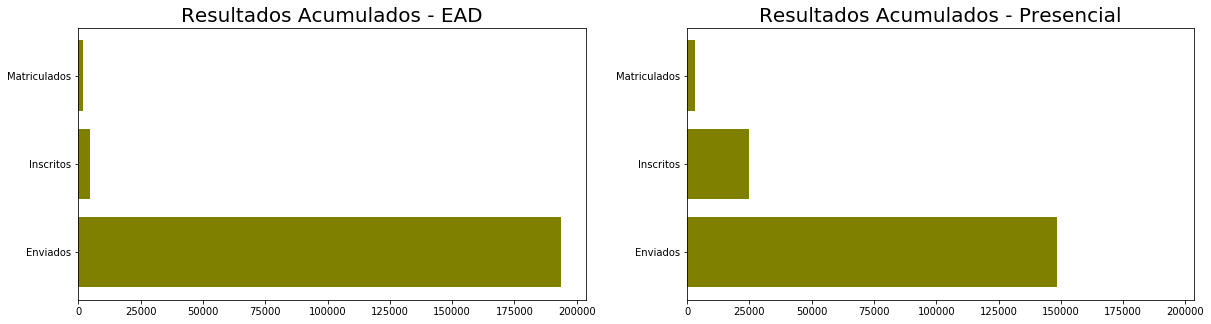

In [7]:
fig, axes = plt.subplots(1,2, sharey=False, sharex=True, figsize=(20,5))
axes[0].barh(x,y,color='olive')
axes[0].set_title('Resultados Acumulados - EAD',fontsize=20);

axes[1].barh(x,y2,color='olive')
axes[1].set_title('Resultados Acumulados - Presencial',fontsize=20);

In [8]:
print('Taxa de Conversão - Inscritos no EAD: ',tx_conversao_inscrito)
print()
print('Taxa de Conversão - Matriculados no EAD', tx_conversao_matricula)
print('----------------------------------------------------------------')
print()
print('Taxa de Conversão - Inscritos no PRESENCIAL',tx_conversao_inscrito2)
print()
print('Taxa de Conversão - Matriculados no PRESENCIAL',tx_conversao_matricula2)
print()
print('-----------------------------------------------------------------')
print('Taxa de Conversao Final - Inscritos: ',round((inscritos+inscritos2)/(leads_enviados+leads_enviados2)*100,3))
print()
print('Taxa de Conversao Final - Matriculados: ',round((matriculados+matriculados2)/(leads_enviados+leads_enviados2)*100,3))

Taxa de Conversão - Inscritos no EAD:  2.497

Taxa de Conversão - Matriculados no EAD 0.951
----------------------------------------------------------------

Taxa de Conversão - Inscritos no PRESENCIAL 16.809

Taxa de Conversão - Matriculados no PRESENCIAL 2.041

-----------------------------------------------------------------
Taxa de Conversao Final - Inscritos:  8.707

Taxa de Conversao Final - Matriculados:  1.424


<B> ANÁLISE GEOGRÁFICA DE CONVERSÃO

In [11]:
df.columns

Index(['Unnamed: 0', 'PLANILHA', 'Carimbo', 'Id', 'Nome', 'Email', 'Telefone',
       'Sexo', 'Idade', 'Cidade', 'Estado', 'Ano Escolar', 'Ciclo_Envio',
       'Ciclo Geral', 'Ciclo_Lead', 'Envios', 'Data Envio', 'Data de Cadastro',
       'EAD_mat', 'PRESENCIAL_mat', 'EAD_insc', 'PRESENCIAL_insc',
       'ESTADO (EXTENSO)', 'CIDADE_TIPO'],
      dtype='object')

In [12]:
estado = df.groupby(['Estado']).agg({'Envios':'sum', 'EAD_mat':'sum', 'PRESENCIAL_mat':'sum','EAD_insc':'sum','PRESENCIAL_insc':'sum'}).reset_index().sort_values('Estado',ascending=True)

In [48]:
# Removendo Não Declarados para tirar o Outlier
estado = estado[~(estado['Estado']=='NAO DECLARADO')]

In [49]:
x = np.array(estado['Estado'])
y = np.array(estado['Envios'])
z = np.array((estado['EAD_mat']+estado['PRESENCIAL_mat'])/estado['Envios'])
a = np.array((estado['EAD_insc']+estado['PRESENCIAL_insc'])/estado['Envios']) 

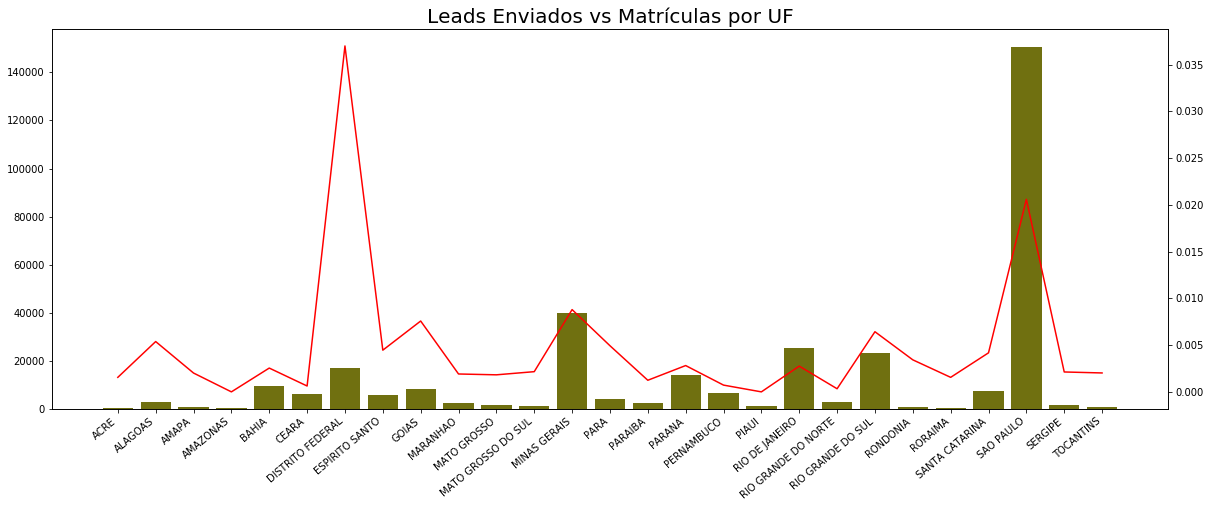

In [50]:
plt.figure(figsize=(20,7))
ax = sns.barplot(x,y,color='olive')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax2 = ax.twinx()  
ax2 = sns.lineplot(x,z,color='red')
ax.set_title('Leads Enviados vs Matrículas por UF',fontsize=20);

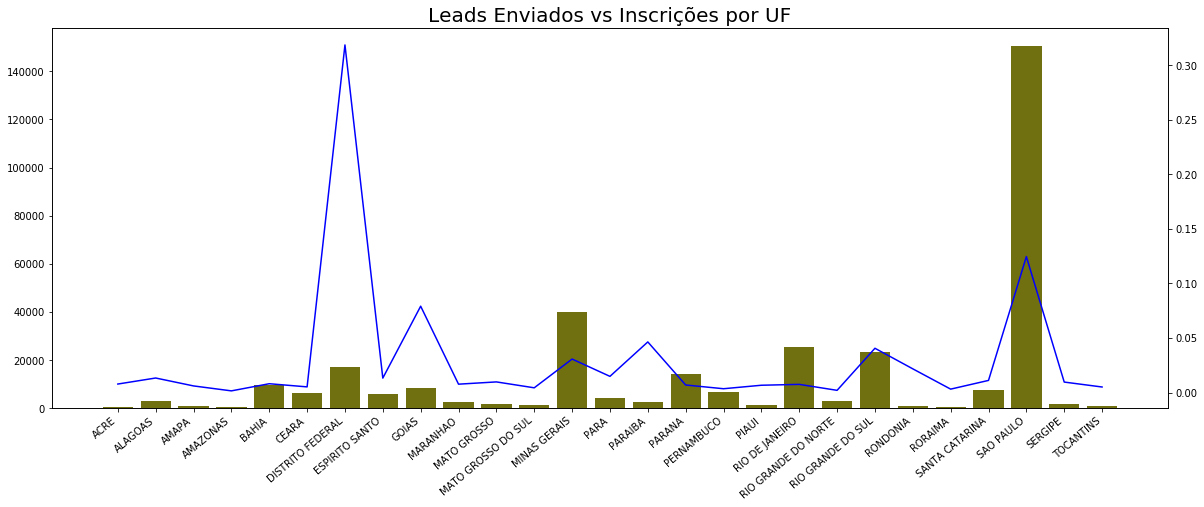

In [51]:
plt.figure(figsize=(20,7))
ax = sns.barplot(x,y,color='olive')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax2 = ax.twinx()  
ax2 = sns.lineplot(x,a,color='blue')
ax.set_title('Leads Enviados vs Inscrições por UF',fontsize=20);

In [52]:
tipo_cidade = df.groupby('CIDADE_TIPO').agg({'Envios':'sum', 'EAD_mat':'sum', 'PRESENCIAL_mat':'sum','EAD_insc':'sum','PRESENCIAL_insc':'sum'}).reset_index().sort_values('CIDADE_TIPO',ascending=True)

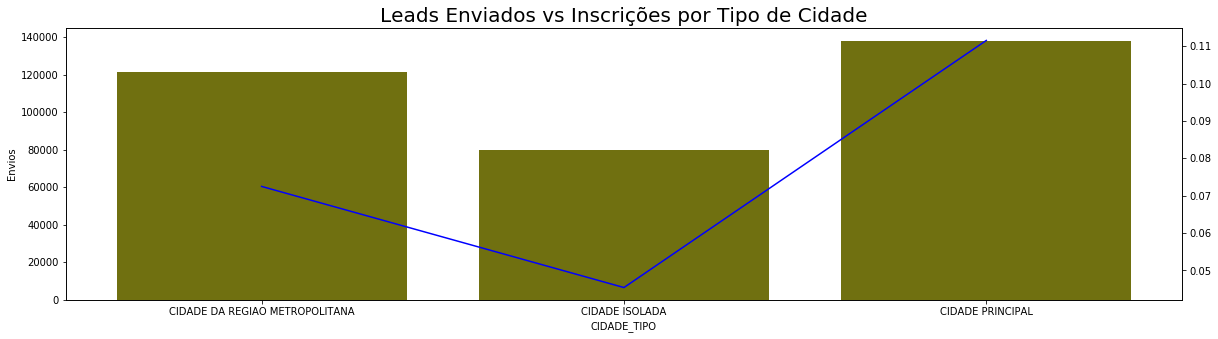

In [53]:
plt.figure(figsize=(20,5))
ax = sns.barplot(tipo_cidade['CIDADE_TIPO'],tipo_cidade['Envios'],color='olive')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
ax2 = ax.twinx()  
ax2 = sns.lineplot(tipo_cidade['CIDADE_TIPO'],((tipo_cidade['EAD_insc']+tipo_cidade['PRESENCIAL_insc'])/tipo_cidade['Envios']),color='blue')
ax.set_title('Leads Enviados vs Inscrições por Tipo de Cidade',fontsize=20);

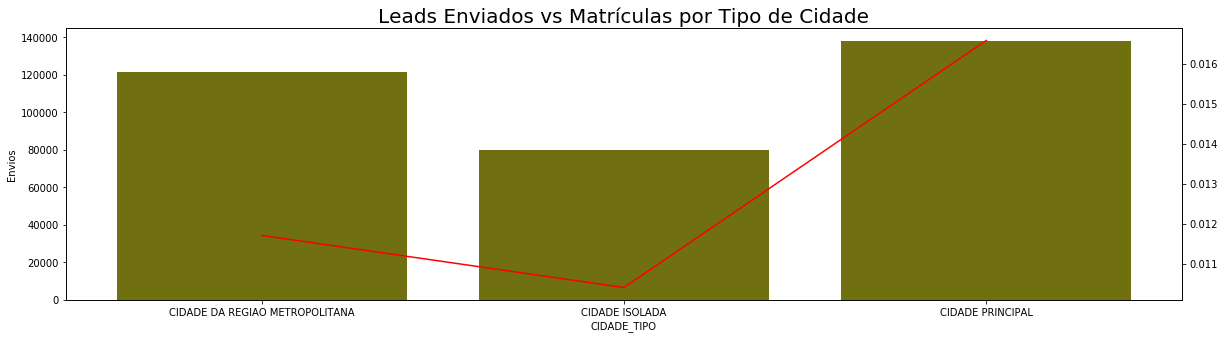

In [54]:
plt.figure(figsize=(20,5))
ax = sns.barplot(tipo_cidade['CIDADE_TIPO'],tipo_cidade['Envios'],color='olive')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
ax2 = ax.twinx()  
ax2 = sns.lineplot(tipo_cidade['CIDADE_TIPO'],((tipo_cidade['EAD_mat']+tipo_cidade['PRESENCIAL_mat'])/tipo_cidade['Envios']),color='red')
ax.set_title('Leads Enviados vs Matrículas por Tipo de Cidade',fontsize=20);

<B> ANÁLISE DE CONVERSÃO POR ESCOLARIDADE

In [55]:
ano_escolar = df.groupby('Ano Escolar').agg({'Envios':'sum', 'EAD_mat':'sum', 'PRESENCIAL_mat':'sum','EAD_insc':'sum','PRESENCIAL_insc':'sum'}).reset_index().sort_values('Ano Escolar',ascending=True)

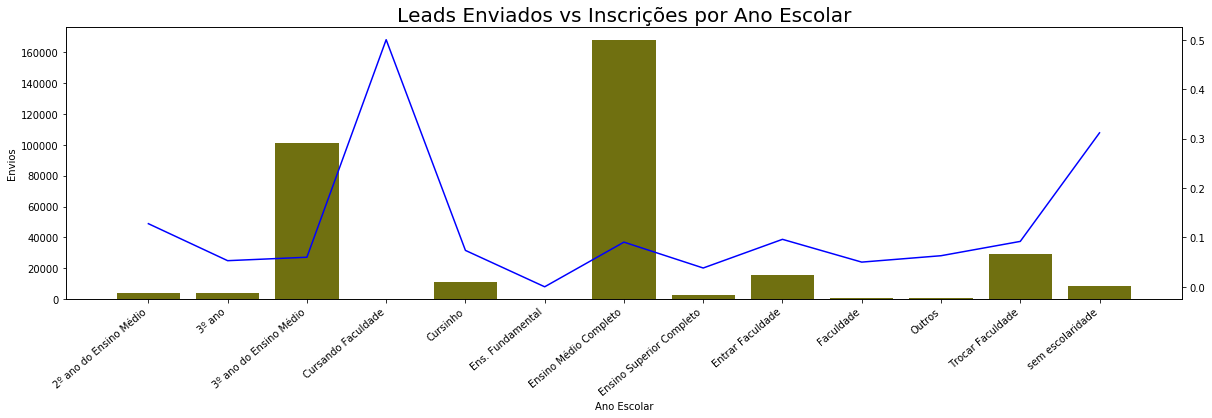

In [56]:
plt.figure(figsize=(20,5))
ax = sns.barplot(ano_escolar['Ano Escolar'],ano_escolar['Envios'],color='olive')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax2 = ax.twinx()  
ax2 = sns.lineplot(ano_escolar['Ano Escolar'],((ano_escolar['EAD_insc']+ano_escolar['PRESENCIAL_insc'])/ano_escolar['Envios']),color='blue')
ax.set_title('Leads Enviados vs Inscrições por Ano Escolar',fontsize=20);

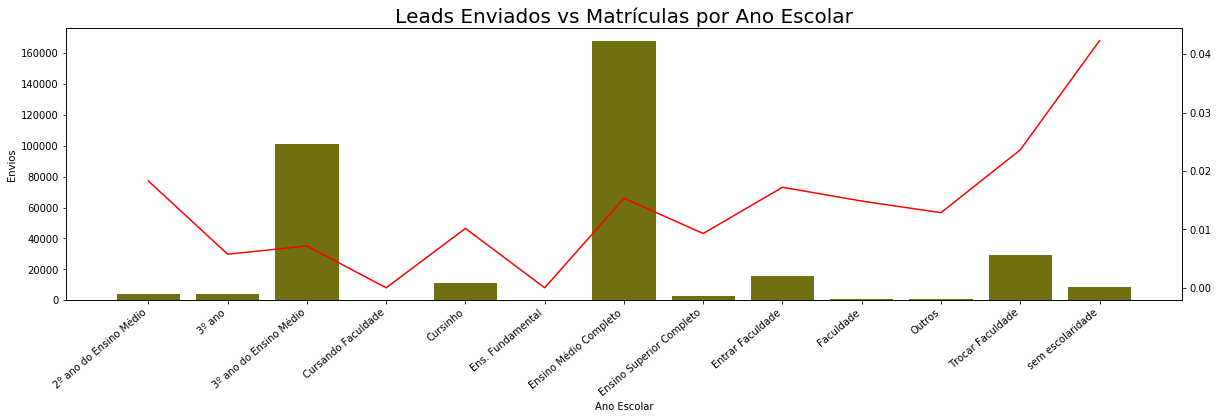

In [57]:
plt.figure(figsize=(20,5))
ax = sns.barplot(ano_escolar['Ano Escolar'],ano_escolar['Envios'],color='olive')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax2 = ax.twinx()  
ax2 = sns.lineplot(ano_escolar['Ano Escolar'],((ano_escolar['EAD_mat']+ano_escolar['PRESENCIAL_mat'])/ano_escolar['Envios']),color='red')
ax.set_title('Leads Enviados vs Matrículas por Ano Escolar',fontsize=20);

<B> ANÁLISE DE CONVERSÃO POR IDADE

In [58]:
bins = [15,18,21,25,30]
labels = ['15-17','18-21','22-25','30+']
df['Idade_Range'] = pd.cut(df['Idade'], bins,labels=labels,include_lowest=True)

In [59]:
idade = df.groupby('Idade_Range').agg({'Envios':'sum', 'EAD_mat':'sum', 'PRESENCIAL_mat':'sum','EAD_insc':'sum','PRESENCIAL_insc':'sum'}).reset_index().sort_values('Idade_Range',ascending=True)

In [60]:
idade['tx_insc'] = (idade['PRESENCIAL_insc']+idade['EAD_insc']) / idade['Envios']
idade['tx_mat'] = (idade['PRESENCIAL_mat']+idade['EAD_mat']) / idade['Envios']
idade

,Idade_Range,Envios,EAD_mat,PRESENCIAL_mat,EAD_insc,PRESENCIAL_insc,tx_insc,tx_mat
0,15-17,199849.0,499.0,1737.0,1408.0,15361.0,0.083908,0.011188
1,18-21,89171.0,567.0,909.0,1429.0,6722.0,0.091409,0.016552
2,22-25,40334.0,458.0,306.0,1159.0,2239.0,0.084247,0.018942
3,30+,9114.0,147.0,50.0,403.0,356.0,0.083278,0.021615


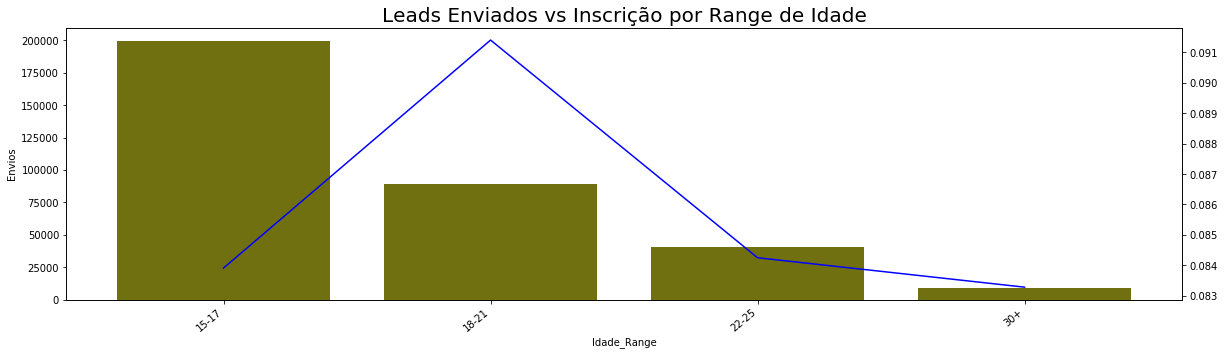

In [61]:
plt.figure(figsize=(20,5))
ax = sns.barplot(idade['Idade_Range'],idade['Envios'],color='olive')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax2 = ax.twinx()  
ax2 = sns.lineplot(idade['Idade_Range'],((idade['EAD_insc']+idade['PRESENCIAL_insc'])/idade['Envios']),color='blue')
ax.set_title('Leads Enviados vs Inscrição por Range de Idade',fontsize=20);

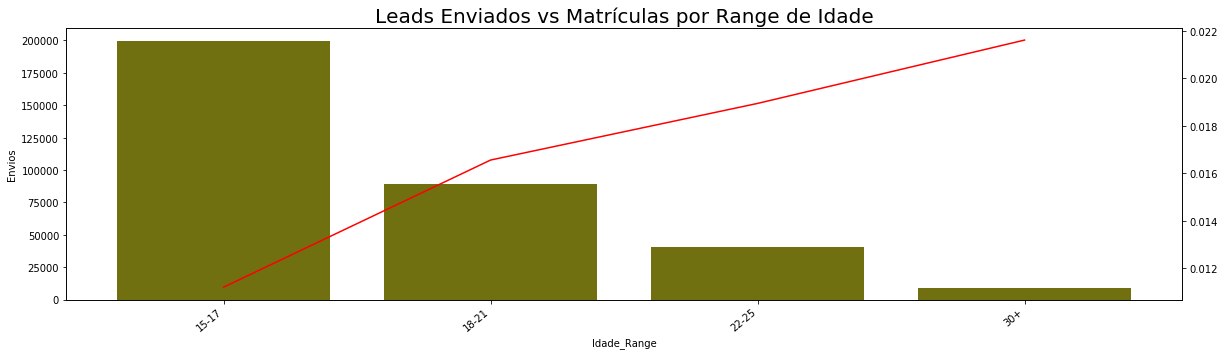

In [62]:
plt.figure(figsize=(20,5))
ax = sns.barplot(idade['Idade_Range'],idade['Envios'],color='olive')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax2 = ax.twinx()  
ax2 = sns.lineplot(idade['Idade_Range'],((idade['EAD_mat']+idade['PRESENCIAL_mat'])/idade['Envios']),color='r')
ax.set_title('Leads Enviados vs Matrículas por Range de Idade',fontsize=20);

<B> ANÁLISE DE CONVERSÃO POR REMESSA

In [63]:
remessa = df.groupby('Carimbo').agg({'Envios':'sum', 'EAD_mat':'sum', 'PRESENCIAL_mat':'sum','EAD_insc':'sum','PRESENCIAL_insc':'sum'}).reset_index().sort_values('Carimbo',ascending=True)

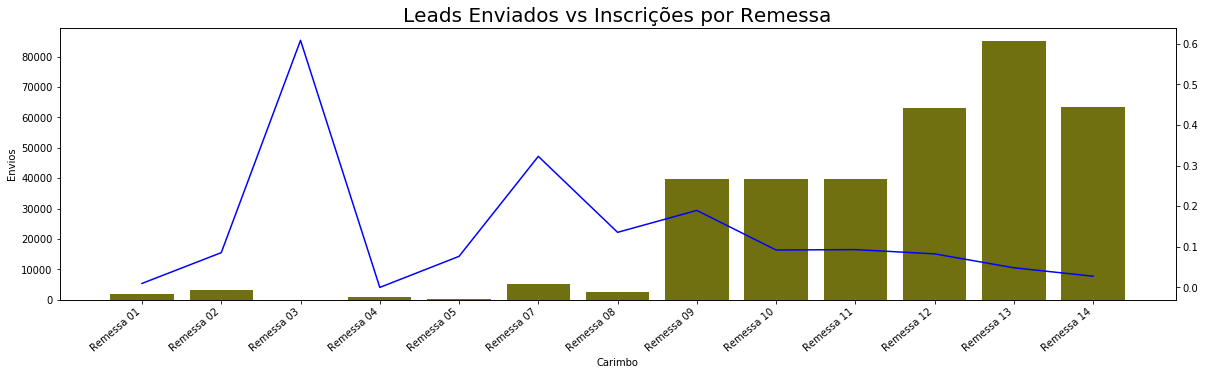

In [64]:
plt.figure(figsize=(20,5))
ax = sns.barplot(remessa['Carimbo'],remessa['Envios'],color='olive')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax2 = ax.twinx()  
ax2 = sns.lineplot(remessa['Carimbo'],((remessa['EAD_insc']+remessa['PRESENCIAL_insc'])/remessa['Envios']),color='blue')
ax.set_title('Leads Enviados vs Inscrições por Remessa',fontsize=20);

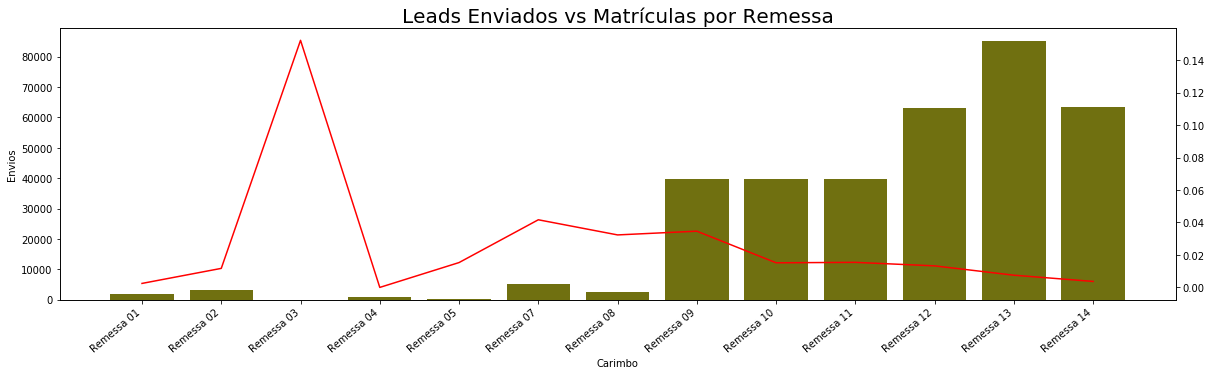

In [65]:
plt.figure(figsize=(20,5))
ax = sns.barplot(remessa['Carimbo'],remessa['Envios'],color='olive')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax2 = ax.twinx()  
ax2 = sns.lineplot(remessa['Carimbo'],((remessa['EAD_mat']+remessa['PRESENCIAL_mat'])/remessa['Envios']),color='r')
ax.set_title('Leads Enviados vs Matrículas por Remessa',fontsize=20);

<b> ANÁLISE DE CONVERSÃO POR DATA DE CADASTRO

In [66]:
data = df.groupby('Data de Cadastro').agg({'Envios':'sum', 'EAD_mat':'sum', 'PRESENCIAL_mat':'sum','EAD_insc':'sum','PRESENCIAL_insc':'sum'}).reset_index().sort_values('Data de Cadastro',ascending=True)

In [67]:
data['Data de Cadastro'] = data['Data de Cadastro'].astype(str)

In [68]:
data['Mês'] = data['Data de Cadastro'].str[:7]

In [69]:
data = data.groupby('Mês').agg({'Envios':'sum', 'EAD_mat':'sum', 'PRESENCIAL_mat':'sum','EAD_insc':'sum','PRESENCIAL_insc':'sum'}).reset_index().sort_values('Mês',ascending=True)

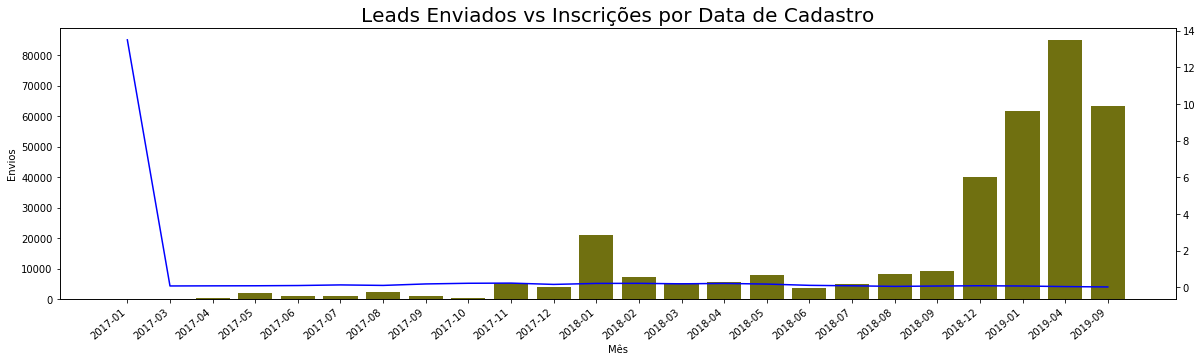

In [70]:
plt.figure(figsize=(20,5))
ax = sns.barplot(data['Mês'],data['Envios'],color='olive')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax2 = ax.twinx()  
ax2 = sns.lineplot(data['Mês'],((data['EAD_insc']+data['PRESENCIAL_insc'])/data['Envios']),color='blue')
ax.set_title('Leads Enviados vs Inscrições por Data de Cadastro',fontsize=20);

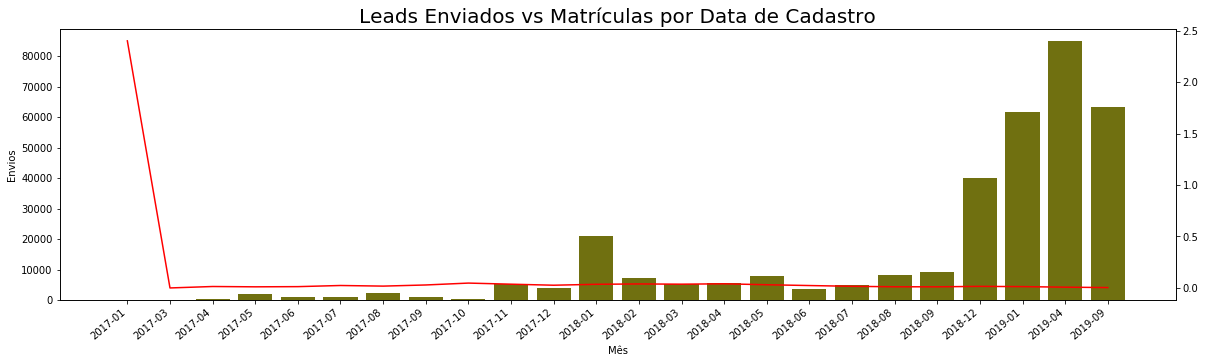

In [71]:
plt.figure(figsize=(20,5))
ax = sns.barplot(data['Mês'],data['Envios'],color='olive')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax2 = ax.twinx()  
ax2 = sns.lineplot(data['Mês'],((data['EAD_mat']+data['PRESENCIAL_mat'])/data['Envios']),color='r')
ax.set_title('Leads Enviados vs Matrículas por Data de Cadastro',fontsize=20);

<b> Análise de ROI

In [72]:
df['valor_lead'] = df['Envios']*3.5

In [73]:
df['Inscrito'] = df['EAD_insc']+df['PRESENCIAL_insc']
df['Matriculado'] = df['EAD_mat']+df['PRESENCIAL_mat']

In [74]:
meses = 24
ticket_ead = 230
ticket_pre = 540
preço = 3.5

In [75]:
# ROI EAD:

ROI = (df['EAD_mat'].sum() * meses * ticket_ead - df[df['PLANILHA']=='EAD']['valor_lead'].sum()) / df[df['PLANILHA']=='EAD']['valor_lead'].sum()

print('Investimento Total: ',(df[df['PLANILHA']=='EAD']['Envios'].sum()*preço))
print('Taxa de Conversão no EAD: ',"{0:.0f}%".format(tx_conversao_matricula))
print('-------------------------------------------------------------------')
print('Valor de ROI: ',ROI*(df[df['PLANILHA']=='EAD']['Envios'].sum())*preço)
print('-------------------------------------------------------------------')
print('ROI Percentual: ',"{0:.0f}%".format(ROI*100))

Investimento Total:  678552.0
Taxa de Conversão no EAD:  1%
-------------------------------------------------------------------
Valor de ROI:  9500328.0
-------------------------------------------------------------------
ROI Percentual:  1400%


In [76]:
# ROI PRESENCIAL

ROI = (df['PRESENCIAL_mat'].sum() * meses * ticket_pre - df[df['PLANILHA']=='PRESENCIAL']['valor_lead'].sum()) / df[df['PLANILHA']=='PRESENCIAL']['valor_lead'].sum()

print('Investimento Total: ',df[df['PLANILHA']=='PRESENCIAL']['Envios'].sum()*preço)
print('Taxa de Conversão no PRESENCIAL: ',"{0:.0f}%".format(tx_conversao_matricula2))
print('-------------------------------------------------------------------')
print('Valor de ROI: ',ROI*(df[df['PLANILHA']=='PRESENCIAL']['Envios'].sum())*preço)
print('-------------------------------------------------------------------')
print('ROI Percentual: ',"{0:.0f}%".format(ROI*100))

Investimento Total:  520026.5
Taxa de Conversão no PRESENCIAL:  2%
-------------------------------------------------------------------
Valor de ROI:  38774693.5
-------------------------------------------------------------------
ROI Percentual:  7456%
